# Nose Boom Measurements

During ACLOUD, AFLUX, and MOSAiC-ACA campaigns meteorological data (temperature, 3 wind components, air pressure) have been measured in high temporal resolution (100 Hz) using instrumentation that was installed at the nose booms of both aircraft Polar 5 and Polar 6.

For each flight the data are given as functions of time and position (including height above ground) along the flight tracks. All flights started and ended in Longyearbyen, Svalbard. Each file represents an entire flight starting well before the first movement of the plane and ending after the final parking position has been reached after landing.

The wind measurement is only valid during flight and the full accuracy is only achieved during straight level flight sections. The absolute accuracy of the wind components is 0.2 m s$^{-1}$ for straight and level flights sections and the relative accuracy of the vertical wind speed is about 0.05 m s$^{-1}$ for straight and level flight sections. For these sections, which can be obtained on the basis of the given roll and pitch angles of the aircraft, the 100 Hz data can be used to derive turbulent fluxes of momentum and sensible heat.

For further informations on the data processing and accuracy of the turbulence measurement refer to **[Hartmann et al. (2018)](https://doi.org/10.5194/amt-11-4567-2018)**. For further information on the ACLOUD campaign we refer to **[Wendisch et al. (2018)](https://doi.org/10.1175/BAMS-D-18-0072.1)** and for AFLUX and MOSAiC-ACA check **[Mech et al. (2022)](https://doi.org/10.1038/s41597-022-01900-7)**.

More information about the data set can be found in **[Hartmann et al. (2019)](https://doi.org/10.1594/PANGAEA.900880)**

## Variables in the data set and their meaning

All data are given as decimal values at 100Hz in columns in this order and meaning:

| variable | meaning |
| --- | --- |
| **t** | UTC-time in seconds (since midnight) |
| **lon** | longitude in degress based on WGS84 |
| **lat** | latitude in degress based on WGS84 |
| **h** | height in metres based on WGS84 |
| **p** | static pressure in hpa, corrected for the influence of the aircraft |
| **T** | temperature from PT100, corrected for adiabatic heating |
| **u** | west-east component of wind speed in m/s, positive towards east |
| **v** | south-north component of wind speed in m/s, positive towards north |
| **w** | vertical wind speed in m/s |
| **pitch** | pitch angle in degrees |
| **roll** | roll angle in degrees |
| **thdg** | true heading of the aircraft in degrees |

## Data access

* To analyse the data they first have to be loaded by importing the (AC)³airborne meta data catalogue. To do so the ac3airborne package has to be installed. More information on how to do that and about the catalog can be found [here](https://github.com/igmk/ac3airborne-intake#ac3airborne-intake-catalogue).

In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

ac3cloud_username = os.environ['AC3_USER']
ac3cloud_password = os.environ['AC3_PASSWORD']

credentials = dict(user=ac3cloud_username, password=ac3cloud_password)

# local caching
kwds = {'simplecache': dict(
    cache_storage=os.environ['INTAKE_CACHE'], 
    same_names=True
)}

## Get data

In [1]:
import ac3airborne as ac3a

We first want to list the available research flights for the polar 5:

In [2]:
cat = ac3a.get_intake_catalog()

datasets_p5 = []
for campaign in ['ACLOUD','AFLUX','MOSAiC-ACA']:
    datasets_p5.extend(list(cat[campaign]['P5']['NOSE_BOOM']))
datasets_p5

['ACLOUD_P5_RF04',
 'ACLOUD_P5_RF05',
 'ACLOUD_P5_RF06',
 'ACLOUD_P5_RF07',
 'ACLOUD_P5_RF08',
 'ACLOUD_P5_RF10',
 'ACLOUD_P5_RF11',
 'ACLOUD_P5_RF13',
 'ACLOUD_P5_RF14',
 'ACLOUD_P5_RF15',
 'ACLOUD_P5_RF16',
 'ACLOUD_P5_RF17',
 'ACLOUD_P5_RF18',
 'ACLOUD_P5_RF19',
 'ACLOUD_P5_RF20',
 'ACLOUD_P5_RF21',
 'ACLOUD_P5_RF22',
 'ACLOUD_P5_RF23',
 'ACLOUD_P5_RF25',
 'AFLUX_P5_RF02',
 'AFLUX_P5_RF03',
 'AFLUX_P5_RF04',
 'AFLUX_P5_RF05',
 'AFLUX_P5_RF06',
 'AFLUX_P5_RF07',
 'AFLUX_P5_RF08',
 'AFLUX_P5_RF09',
 'AFLUX_P5_RF10',
 'AFLUX_P5_RF12',
 'AFLUX_P5_RF13',
 'AFLUX_P5_RF14',
 'AFLUX_P5_RF15',
 'MOSAiC-ACA_P5_RF01',
 'MOSAiC-ACA_P5_RF02',
 'MOSAiC-ACA_P5_RF03',
 'MOSAiC-ACA_P5_RF04',
 'MOSAiC-ACA_P5_RF05',
 'MOSAiC-ACA_P5_RF06',
 'MOSAiC-ACA_P5_RF07',
 'MOSAiC-ACA_P5_RF08',
 'MOSAiC-ACA_P5_RF09',
 'MOSAiC-ACA_P5_RF10',
 'MOSAiC-ACA_P5_RF11']

and for the polar 6:

In [3]:
datasets_p6 = []
for campaign in ['ACLOUD']:
    datasets_p6.extend(list(cat[campaign]['P6']['NOSE_BOOM']))
datasets_p6

['ACLOUD_P6_RF07',
 'ACLOUD_P6_RF08',
 'ACLOUD_P6_RF09',
 'ACLOUD_P6_RF10',
 'ACLOUD_P6_RF11',
 'ACLOUD_P6_RF12',
 'ACLOUD_P6_RF13',
 'ACLOUD_P6_RF14',
 'ACLOUD_P6_RF15',
 'ACLOUD_P6_RF16',
 'ACLOUD_P6_RF17',
 'ACLOUD_P6_RF18',
 'ACLOUD_P6_RF19',
 'ACLOUD_P6_RF20',
 'ACLOUD_P6_RF21',
 'ACLOUD_P6_RF22',
 'ACLOUD_P6_RF23',
 'ACLOUD_P6_RF24',
 'ACLOUD_P6_RF25']

```{note}
The nose boom data files on PANGEA are given as gzipped ASCII files and not as NetCDF. The function `get_intake_catalog` uses in background the pandas function `read_csv`. Some of the following steps are therefore different than for other available datasets in `ac3airborne`.
```

We want to show an example of a joint flight of the polar 5 and polar 6, so we import the nose boom measurements of both aircrafts:

In [4]:
ds_p5 = cat['ACLOUD']['P5']['NOSE_BOOM']['ACLOUD_P5_RF07'].read()
ds_p5

,t,lon,lat,h,p,T,u,v,w,pitch,roll,thdg
0,46816.00,15.503975,78.245735,24.24,1018.5,-2.62,9.98,-2.26,-2.13,11.52,1.53,282.79
1,46816.01,15.503976,78.245735,24.24,1018.6,-2.62,9.90,-2.24,-2.10,11.52,1.53,282.79
2,46816.02,15.503976,78.245735,24.24,1017.6,-2.61,10.30,-2.34,-2.18,11.52,1.53,282.79
3,46816.03,15.503976,78.245735,24.24,1018.3,-2.61,10.22,-2.32,-2.17,11.52,1.52,282.79
4,46816.04,15.503975,78.245735,24.24,1018.2,-2.61,10.00,-2.27,-2.12,11.52,1.52,282.80
...,...,...,...,...,...,...,...,...,...,...,...,...
1251090,59326.90,15.504173,78.245728,26.54,1018.1,-2.56,9.00,-2.95,-1.99,11.90,1.71,288.12
1251091,59326.91,15.504173,78.245728,26.54,1018.1,-2.56,8.98,-2.94,-1.99,11.90,1.71,288.12
1251092,59326.92,15.504173,78.245728,26.54,1018.0,-2.58,8.96,-2.94,-1.99,11.90,1.71,288.12
1251093,59326.93,15.504173,78.245728,26.54,1017.8,-2.57,9.00,-2.95,-1.99,11.90,1.71,288.12


The same for the polar 6:

In [5]:
ds_p6 = cat['ACLOUD']['P6']['NOSE_BOOM']['ACLOUD_P6_RF07'].read()

## Make some optional changes on the data set

You may want to change the time to another format such as `datetime`, since it is given as UTC-time in seconds (since midnight). You may also want to change the index of the pandas Dataframe to be the time itself instead of the row number.  Another things you may want to do is to convert the data to an `xarray` dataset.

### Change the time format

The time is given as UTC-time in seconds (since midnight). So we first need to find out the date of the joint research flight:

In [6]:
meta = ac3a.get_flight_segments()
date = meta['ACLOUD']['P5']['ACLOUD_P5_RF07']['date']
date

datetime.date(2017, 5, 27)

Which is obviously the same for the polar 6:

In [7]:
date = meta['ACLOUD']['P6']['ACLOUD_P6_RF07']['date']
date

datetime.date(2017, 5, 27)

After that we convert the time in seconds from the midnight to `datetime`:

In [8]:
import pandas as pd

ds_p5['t'] = pd.to_datetime(ds_p5['t'], unit='s', origin=date)
ds_p5

,t,lon,lat,h,p,T,u,v,w,pitch,roll,thdg
0,2017-05-27 13:00:16.000000000,15.503975,78.245735,24.24,1018.5,-2.62,9.98,-2.26,-2.13,11.52,1.53,282.79
1,2017-05-27 13:00:16.009999872,15.503976,78.245735,24.24,1018.6,-2.62,9.90,-2.24,-2.10,11.52,1.53,282.79
2,2017-05-27 13:00:16.020000000,15.503976,78.245735,24.24,1017.6,-2.61,10.30,-2.34,-2.18,11.52,1.53,282.79
3,2017-05-27 13:00:16.029999872,15.503976,78.245735,24.24,1018.3,-2.61,10.22,-2.32,-2.17,11.52,1.52,282.79
4,2017-05-27 13:00:16.040000000,15.503975,78.245735,24.24,1018.2,-2.61,10.00,-2.27,-2.12,11.52,1.52,282.80
...,...,...,...,...,...,...,...,...,...,...,...,...
1251090,2017-05-27 16:28:46.900000000,15.504173,78.245728,26.54,1018.1,-2.56,9.00,-2.95,-1.99,11.90,1.71,288.12
1251091,2017-05-27 16:28:46.910000128,15.504173,78.245728,26.54,1018.1,-2.56,8.98,-2.94,-1.99,11.90,1.71,288.12
1251092,2017-05-27 16:28:46.920000000,15.504173,78.245728,26.54,1018.0,-2.58,8.96,-2.94,-1.99,11.90,1.71,288.12
1251093,2017-05-27 16:28:46.930000128,15.504173,78.245728,26.54,1017.8,-2.57,9.00,-2.95,-1.99,11.90,1.71,288.12


The same for the polar 6:

In [9]:
ds_p6['t'] = pd.to_datetime(ds_p6['t'], unit='s', origin=date)

### Change the index of the pandas DataFrame to be the time

The time is not given as the index of the table by default:

In [10]:
ds_p5 = ds_p5.set_index('t')
ds_p5

,lon,lat,h,p,T,u,v,w,pitch,roll,thdg
t,,,,,,,,,,,
2017-05-27 13:00:16.000000000,15.503975,78.245735,24.24,1018.5,-2.62,9.98,-2.26,-2.13,11.52,1.53,282.79
2017-05-27 13:00:16.009999872,15.503976,78.245735,24.24,1018.6,-2.62,9.90,-2.24,-2.10,11.52,1.53,282.79
2017-05-27 13:00:16.020000000,15.503976,78.245735,24.24,1017.6,-2.61,10.30,-2.34,-2.18,11.52,1.53,282.79
2017-05-27 13:00:16.029999872,15.503976,78.245735,24.24,1018.3,-2.61,10.22,-2.32,-2.17,11.52,1.52,282.79
2017-05-27 13:00:16.040000000,15.503975,78.245735,24.24,1018.2,-2.61,10.00,-2.27,-2.12,11.52,1.52,282.80
...,...,...,...,...,...,...,...,...,...,...,...
2017-05-27 16:28:46.900000000,15.504173,78.245728,26.54,1018.1,-2.56,9.00,-2.95,-1.99,11.90,1.71,288.12
2017-05-27 16:28:46.910000128,15.504173,78.245728,26.54,1018.1,-2.56,8.98,-2.94,-1.99,11.90,1.71,288.12
2017-05-27 16:28:46.920000000,15.504173,78.245728,26.54,1018.0,-2.58,8.96,-2.94,-1.99,11.90,1.71,288.12


The same for the polar 6:

In [11]:
ds_p6 = ds_p6.set_index('t')

### Convert the data to xarray

If you want the date to be an xarray do so:

In [12]:
ds_p5 = ds_p5.to_xarray()
ds_p5

<xarray.Dataset>
Dimensions:  (t: 1251095)
Coordinates:
  * t        (t) datetime64[ns] 2017-05-27T13:00:16 ... 2017-05-27T16:28:46.9...
Data variables:
    lon      (t) float64 15.5 15.5 15.5 15.5 15.5 ... 15.5 15.5 15.5 15.5 15.5
    lat      (t) float64 78.25 78.25 78.25 78.25 ... 78.25 78.25 78.25 78.25
    h        (t) float64 24.24 24.24 24.24 24.24 ... 26.54 26.54 26.54 26.54
    p        (t) float64 1.018e+03 1.019e+03 1.018e+03 ... 1.018e+03 1.018e+03
    T        (t) float64 -2.62 -2.62 -2.61 -2.61 ... -2.56 -2.58 -2.57 -2.57
    u        (t) float64 9.98 9.9 10.3 10.22 10.0 ... 9.0 8.98 8.96 9.0 9.05
    v        (t) float64 -2.26 -2.24 -2.34 -2.32 ... -2.94 -2.94 -2.95 -2.96
    w        (t) float64 -2.13 -2.1 -2.18 -2.17 -2.12 ... -1.99 -1.99 -1.99 -2.0
    pitch    (t) float64 11.52 11.52 11.52 11.52 11.52 ... 11.9 11.9 11.9 11.9
    roll     (t) float64 1.53 1.53 1.53 1.52 1.52 ... 1.71 1.71 1.71 1.71 1.71
    thdg     (t) float64 282.8 282.8 282.8 282.8 ... 288.1 288.1 288.1 288.1

The same for the polar 6:

In [13]:
ds_p6 = ds_p6.to_xarray()

## Example: ACLOUD Joint flight P5 and P6 on 27-05-2017

First, the entire two flights are plotted on a geographic map:

In [14]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
plt.style.use("../../mplstyle/book")

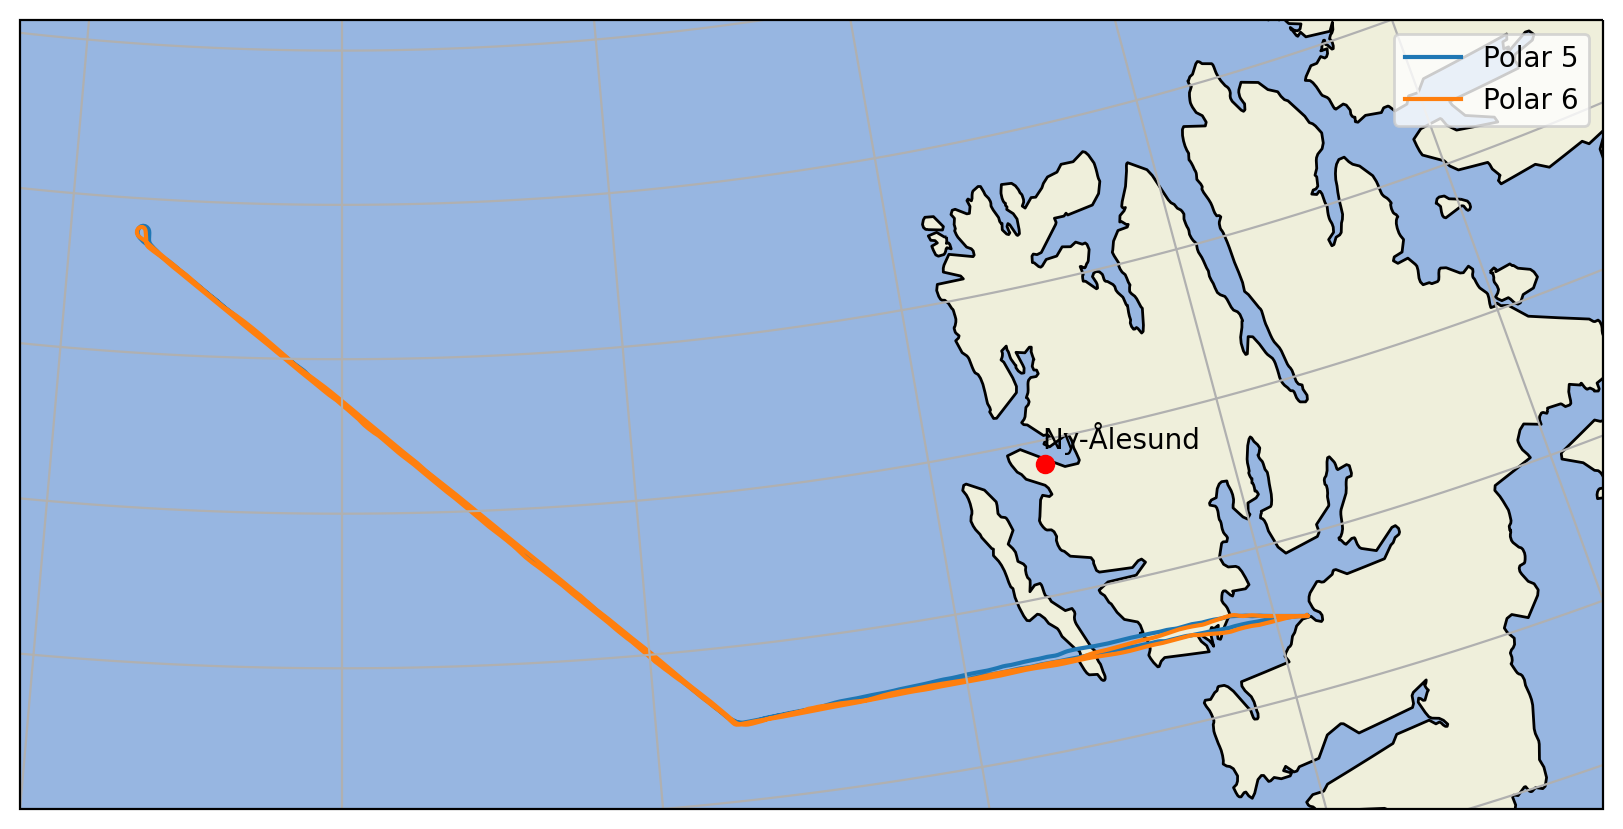

In [15]:
proj = ccrs.NorthPolarStereo()
extent = (-5.0, 20.0, 78.0, 80.0)

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=proj)
ax.set_extent(extent)

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.gridlines()
ax.coastlines()

nya_lat = 78.924444
nya_lon = 11.928611

ax.plot(nya_lon, nya_lat, 'ro', transform=ccrs.PlateCarree())
ax.text(nya_lon, nya_lat+0.05, 'Ny-Ålesund', transform=ccrs.PlateCarree())

# the nose boom coordinates have resolution of 0.01 s
# so we take only every 1000 value (10 s) in order to make this plot faster

ax.plot(ds_p5.lon[::1000], ds_p5.lat[::1000], label='Polar 5', transform=ccrs.PlateCarree())
ax.plot(ds_p6.lon[::1000], ds_p6.lat[::1000], label='Polar 6', transform=ccrs.PlateCarree())

ax.legend()

plt.show()

Second we want to look closer at the height and position of the aircrafts in time:

Text(0.5, 0.98, 'Joint flight P5 and P6')

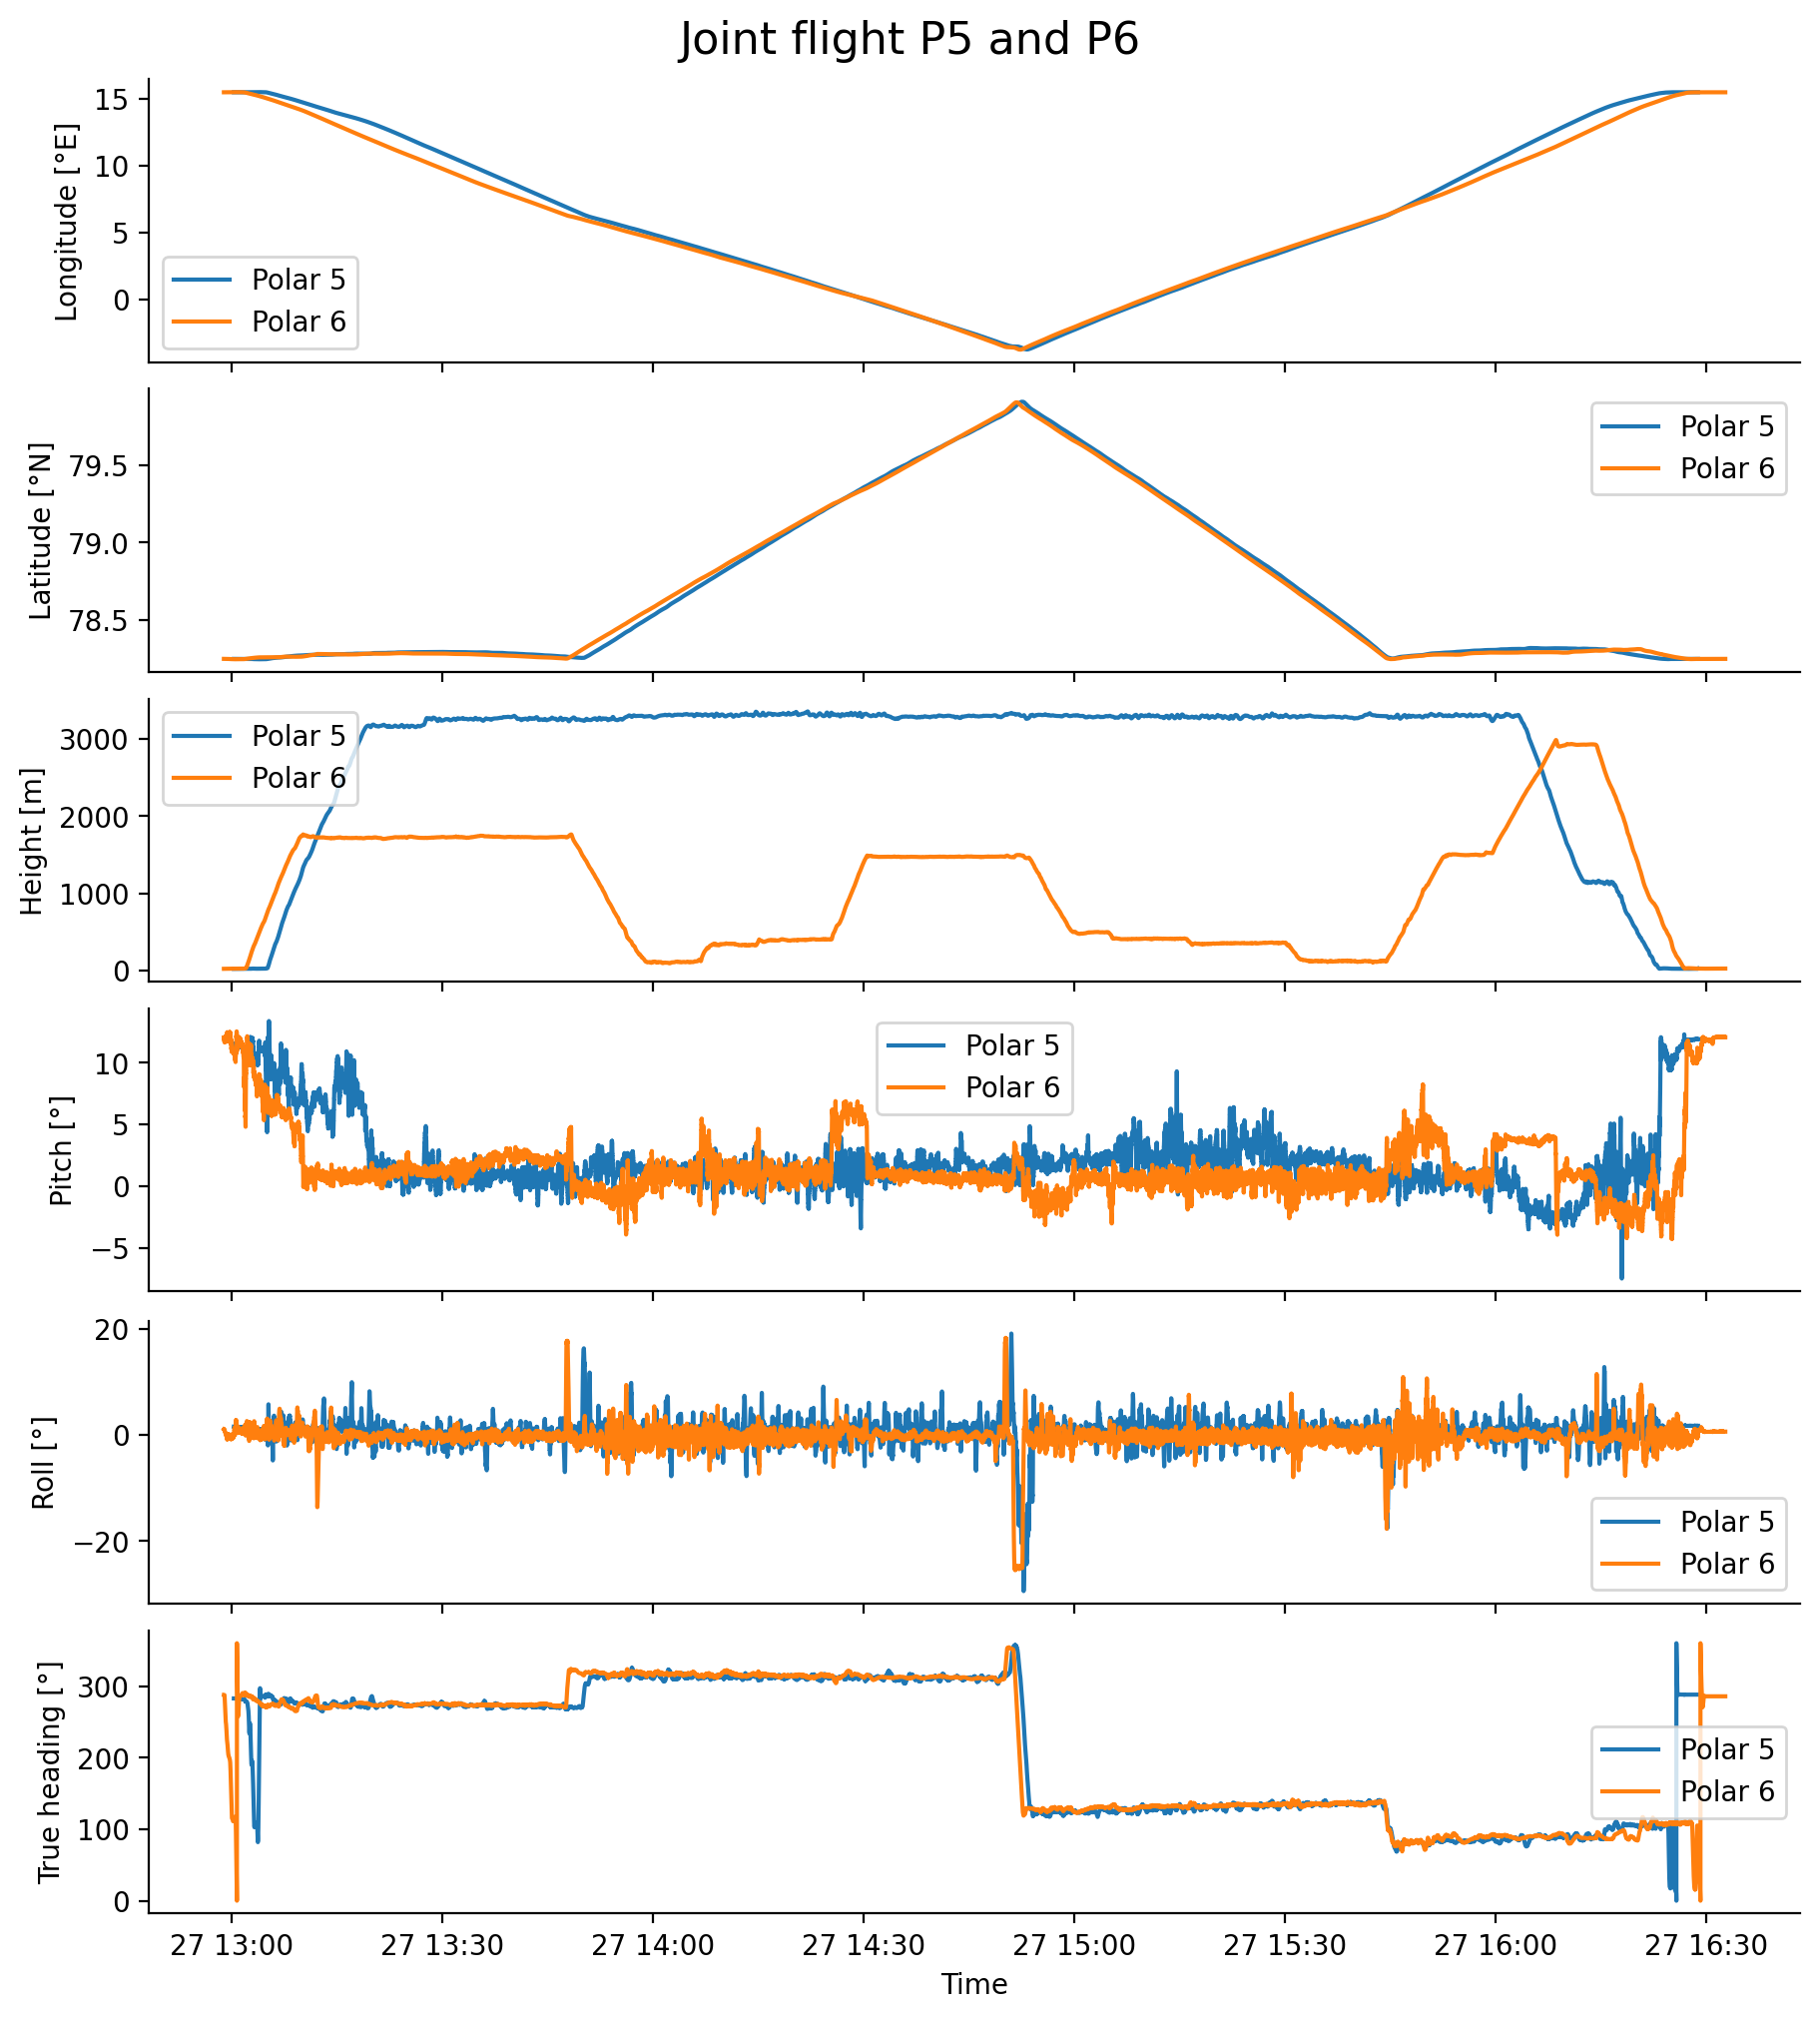

In [16]:
fig, ax = plt.subplots(6, 1, figsize=(9, 10), sharex=True)

ax[0].plot(ds_p5.t, ds_p5['lon'], label='Polar 5')
ax[0].plot(ds_p6.t, ds_p6['lon'], label='Polar 6')

ax[0].set_ylabel('Longitude [°E]')
ax[0].legend()

ax[1].plot(ds_p5.t, ds_p5['lat'], label='Polar 5')
ax[1].plot(ds_p6.t, ds_p6['lat'], label='Polar 6')

ax[1].set_ylabel('Latitude [°N]')
ax[1].legend()

ax[2].plot(ds_p5.t, ds_p5['h'], label='Polar 5')
ax[2].plot(ds_p6.t, ds_p6['h'], label='Polar 6')

ax[2].set_ylabel('Height [m]')
ax[2].legend()

ax[3].plot(ds_p5.t, ds_p5['pitch'], label='Polar 5')
ax[3].plot(ds_p6.t, ds_p6['pitch'], label='Polar 6')

ax[3].set_ylabel('Pitch [°]')
ax[3].legend()

ax[4].plot(ds_p5.t, ds_p5['roll'], label='Polar 5')
ax[4].plot(ds_p6.t, ds_p6['roll'], label='Polar 6')

ax[4].set_ylabel('Roll [°]')
ax[4].legend()

ax[5].plot(ds_p5.t, ds_p5['thdg'], label='Polar 5')
ax[5].plot(ds_p6.t, ds_p6['thdg'], label='Polar 6')

ax[5].set_xlabel('Time')
ax[5].set_ylabel('True heading [°]')
ax[5].legend()

fig.suptitle('Joint flight P5 and P6', fontsize=16)

After having zoomed into the picture (or after having found a suitable segment with the `flightphase`-tools, see "Toolbox and examples"), we can select a particular segment of the flight and compare temperature, pressure and wind, for example, along a straight line at two constant levels:

In [17]:
from datetime import datetime

start = '2017-05-27 14:35:00'
end   = '2017-05-27 14:50:00'

starttime = datetime.strptime(start, '%Y-%m-%d %H:%M:%S')
endtime   = datetime.strptime(end, '%Y-%m-%d %H:%M:%S')

First we plot again the flights on the map, but only in the selected time range:

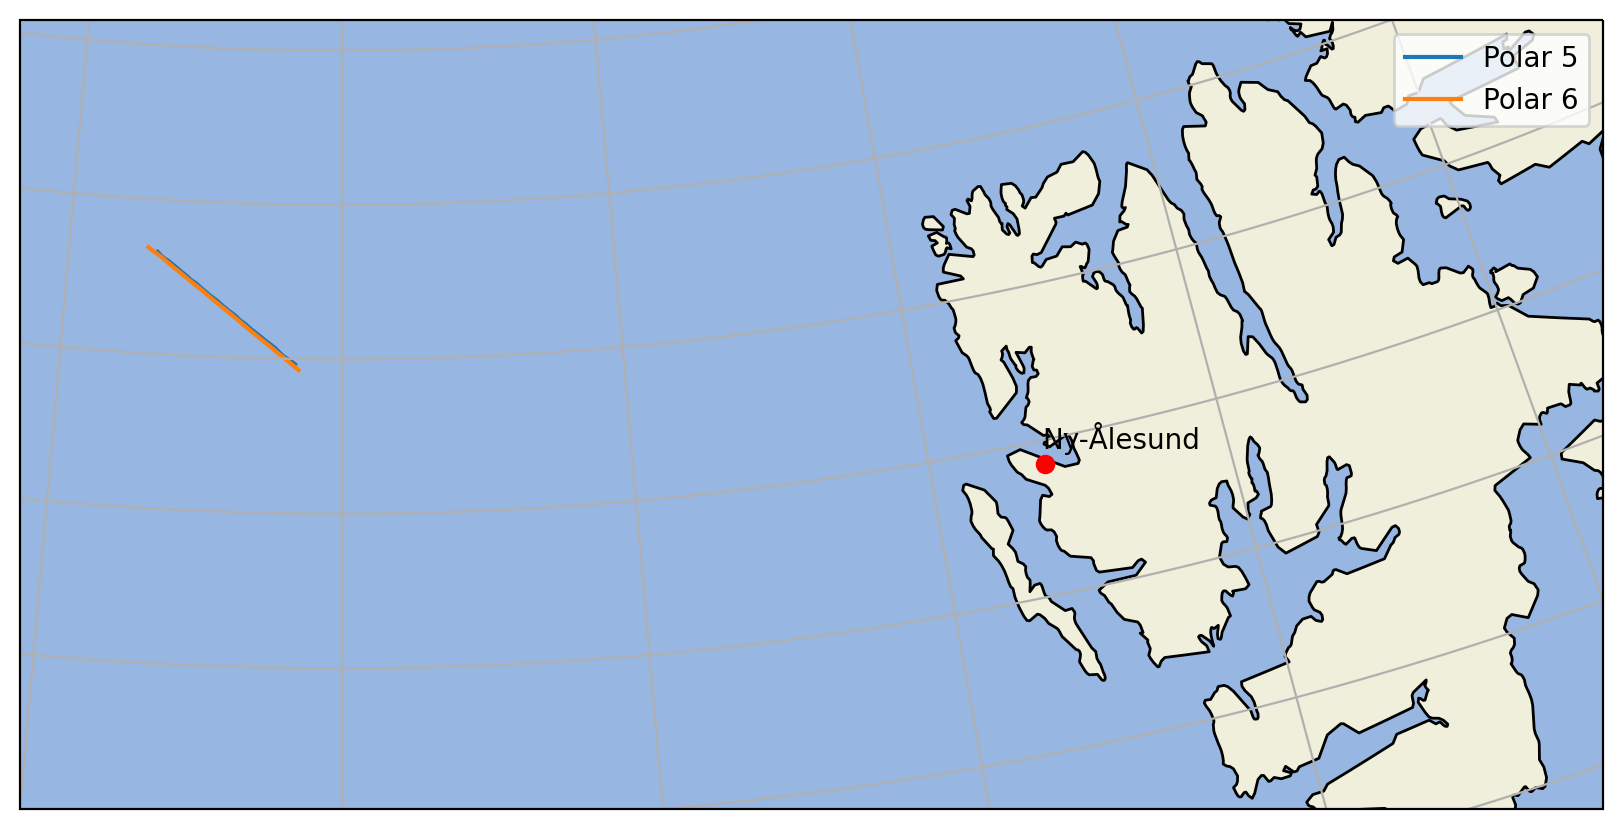

In [18]:
proj = ccrs.NorthPolarStereo()
extent = (-5.0, 20.0, 78.0, 80.0)

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=proj)
ax.set_extent(extent)

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.gridlines()
ax.coastlines()

nya_lat = 78.924444
nya_lon = 11.928611

ax.plot(nya_lon, nya_lat, 'ro', transform=ccrs.PlateCarree())
ax.text(nya_lon, nya_lat+0.05, 'Ny-Ålesund', transform=ccrs.PlateCarree())

# the nose boom coordinates have resolution of 0.01 s
# so we take only every 1000 value (10 s) in order to make this plot faster

ax.plot(ds_p5.lon.sel(t=slice(starttime, endtime)), ds_p5.lat.sel(t=slice(starttime, endtime)), label='Polar 5', transform=ccrs.PlateCarree())
ax.plot(ds_p6.lon.sel(t=slice(starttime, endtime)), ds_p6.lat.sel(t=slice(starttime, endtime)), label='Polar 6', transform=ccrs.PlateCarree())

ax.legend()

plt.show()

The same for position height, pitch, roll and heading:

Text(0.5, 0.98, 'Joint flight P5 and P6')

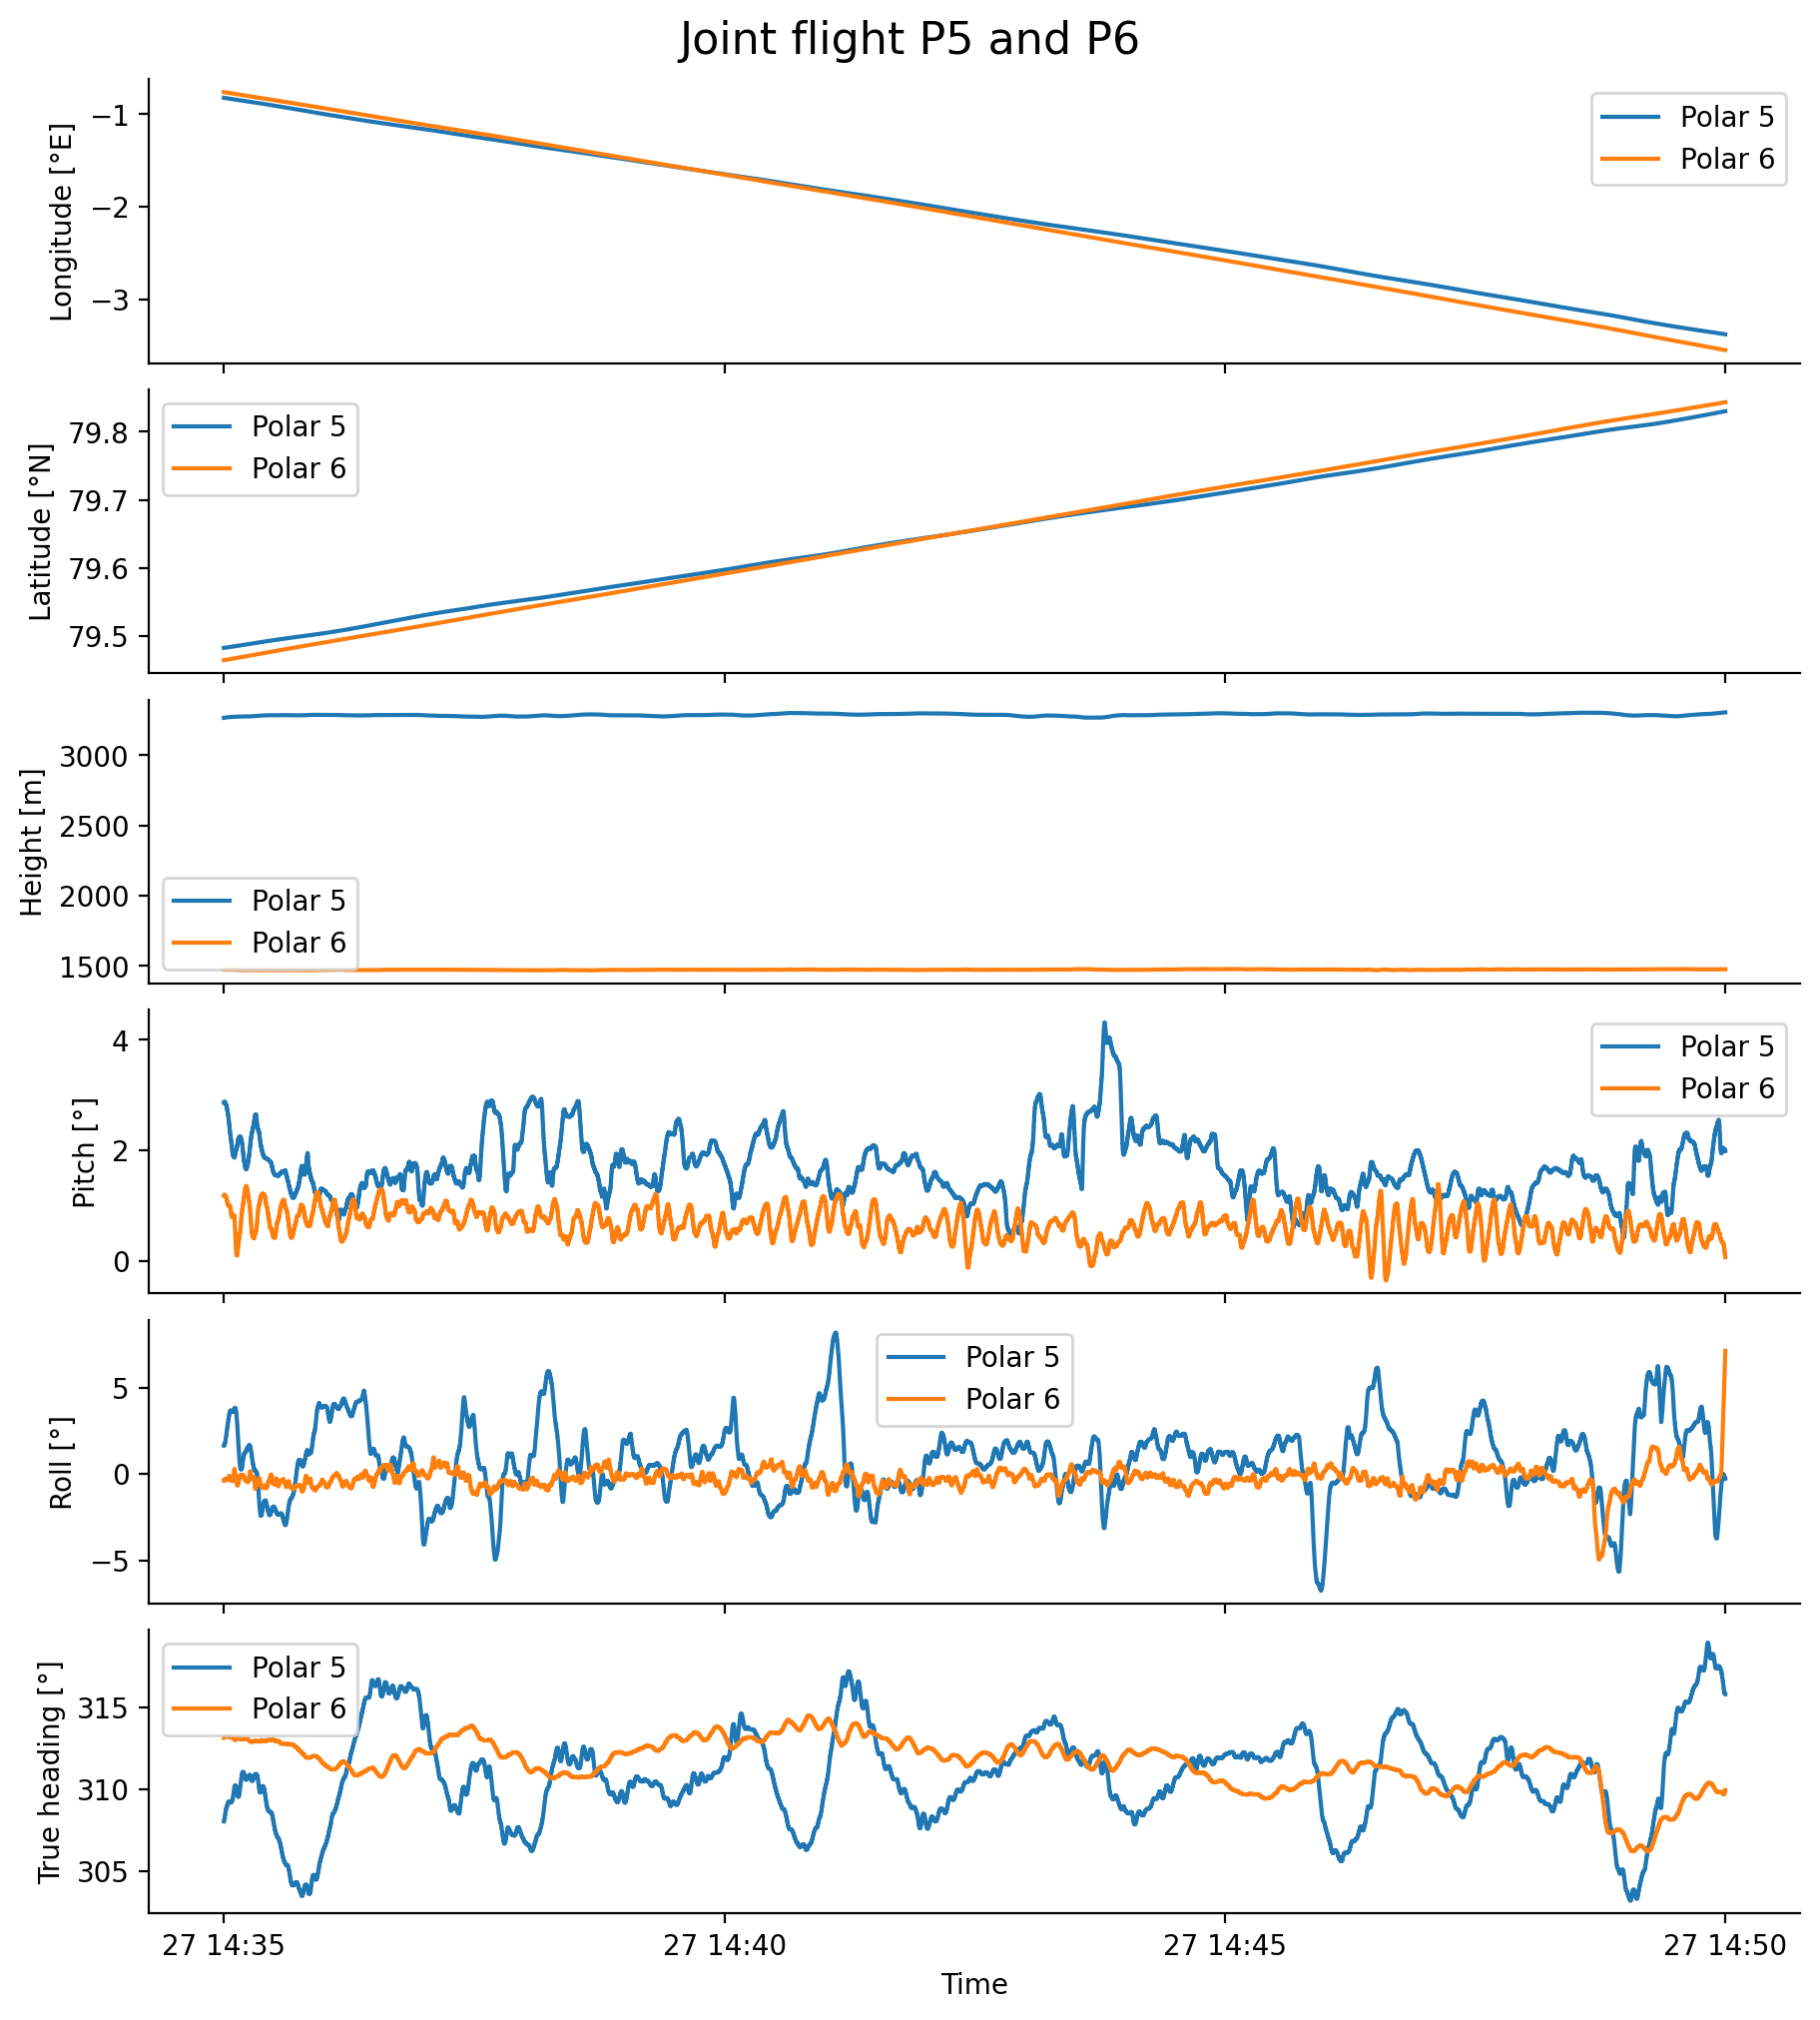

In [19]:
fig, ax = plt.subplots(6, 1, figsize=(9, 10), sharex=True)

ax[0].plot(ds_p5.t.sel(t=slice(starttime, endtime)), ds_p5['lon'].sel(t=slice(starttime, endtime)), label='Polar 5')
ax[0].plot(ds_p6.t.sel(t=slice(starttime, endtime)), ds_p6['lon'].sel(t=slice(starttime, endtime)), label='Polar 6')

ax[0].set_ylabel('Longitude [°E]')
ax[0].legend()

ax[1].plot(ds_p5.t.sel(t=slice(starttime, endtime)), ds_p5['lat'].sel(t=slice(starttime, endtime)), label='Polar 5')
ax[1].plot(ds_p6.t.sel(t=slice(starttime, endtime)), ds_p6['lat'].sel(t=slice(starttime, endtime)), label='Polar 6')

ax[1].set_ylabel('Latitude [°N]')
ax[1].legend()

ax[2].plot(ds_p5.t.sel(t=slice(starttime, endtime)), ds_p5['h'].sel(t=slice(starttime, endtime)), label='Polar 5')
ax[2].plot(ds_p6.t.sel(t=slice(starttime, endtime)), ds_p6['h'].sel(t=slice(starttime, endtime)), label='Polar 6')

ax[2].set_ylabel('Height [m]')
ax[2].legend()

ax[3].plot(ds_p5.t.sel(t=slice(starttime, endtime)), ds_p5['pitch'].sel(t=slice(starttime, endtime)), label='Polar 5')
ax[3].plot(ds_p6.t.sel(t=slice(starttime, endtime)), ds_p6['pitch'].sel(t=slice(starttime, endtime)), label='Polar 6')

ax[3].set_ylabel('Pitch [°]')
ax[3].legend()

ax[4].plot(ds_p5.t.sel(t=slice(starttime, endtime)), ds_p5['roll'].sel(t=slice(starttime, endtime)), label='Polar 5')
ax[4].plot(ds_p6.t.sel(t=slice(starttime, endtime)), ds_p6['roll'].sel(t=slice(starttime, endtime)), label='Polar 6')

ax[4].set_ylabel('Roll [°]')
ax[4].legend()

ax[5].plot(ds_p5.t.sel(t=slice(starttime, endtime)), ds_p5['thdg'].sel(t=slice(starttime, endtime)), label='Polar 5')
ax[5].plot(ds_p6.t.sel(t=slice(starttime, endtime)), ds_p6['thdg'].sel(t=slice(starttime, endtime)), label='Polar 6')

ax[5].set_xlabel('Time')
ax[5].set_ylabel('True heading [°]')
ax[5].legend()

fig.suptitle('Joint flight P5 and P6', fontsize=16)

And now we look at the data for pressure, wind and the three wind components:

Text(0.5, 0.98, 'Joint flight P5 and P6')

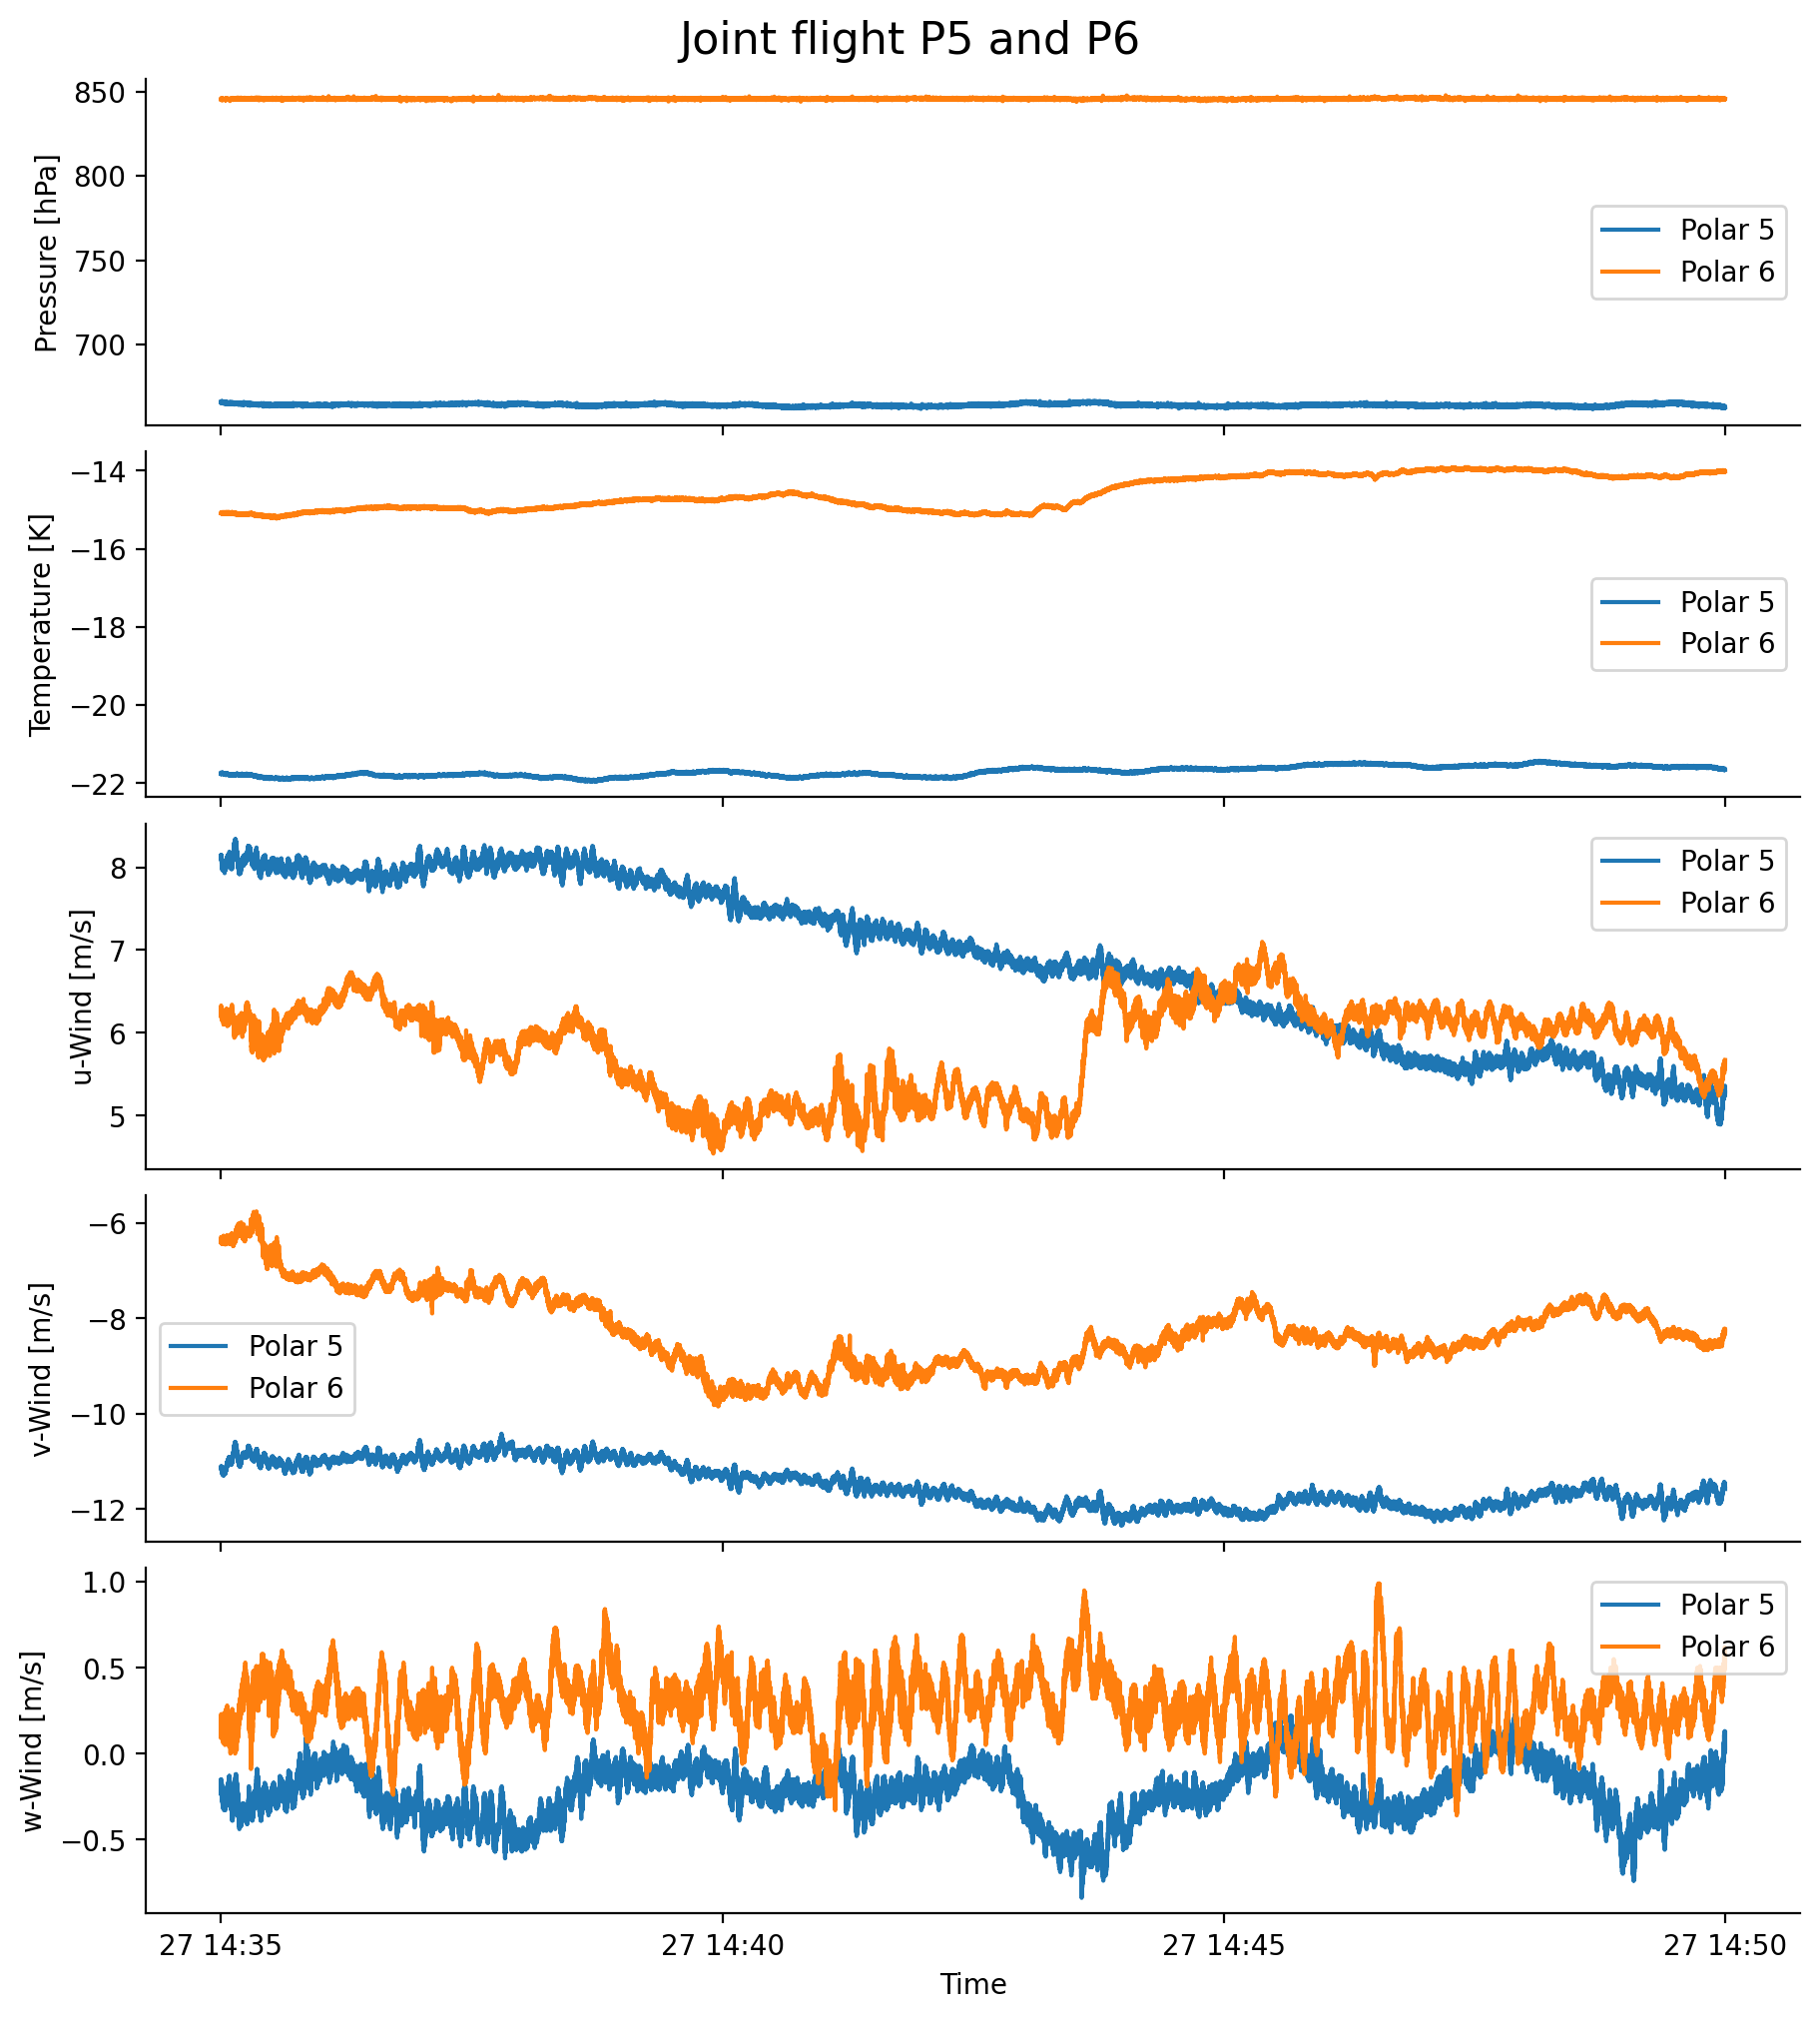

In [20]:
fig, ax = plt.subplots(5, 1, figsize=(9, 10), sharex=True)

ax[0].plot(ds_p5.t.sel(t=slice(starttime, endtime)), ds_p5['p'].sel(t=slice(starttime, endtime)), label='Polar 5')
ax[0].plot(ds_p6.t.sel(t=slice(starttime, endtime)), ds_p6['p'].sel(t=slice(starttime, endtime)), label='Polar 6')

ax[0].set_ylabel('Pressure [hPa]')
ax[0].legend()

ax[1].plot(ds_p5.t.sel(t=slice(starttime, endtime)), ds_p5['T'].sel(t=slice(starttime, endtime)), label='Polar 5')
ax[1].plot(ds_p6.t.sel(t=slice(starttime, endtime)), ds_p6['T'].sel(t=slice(starttime, endtime)), label='Polar 6')

ax[1].set_ylabel('Temperature [K]')
ax[1].legend()

ax[2].plot(ds_p5.t.sel(t=slice(starttime, endtime)), ds_p5['u'].sel(t=slice(starttime, endtime)), label='Polar 5')
ax[2].plot(ds_p6.t.sel(t=slice(starttime, endtime)), ds_p6['u'].sel(t=slice(starttime, endtime)), label='Polar 6')

ax[2].set_ylabel('u-Wind [m/s]')
ax[2].legend()

ax[3].plot(ds_p5.t.sel(t=slice(starttime, endtime)), ds_p5['v'].sel(t=slice(starttime, endtime)), label='Polar 5')
ax[3].plot(ds_p6.t.sel(t=slice(starttime, endtime)), ds_p6['v'].sel(t=slice(starttime, endtime)), label='Polar 6')

ax[3].set_ylabel('v-Wind [m/s]')
ax[3].legend()

ax[4].plot(ds_p5.t.sel(t=slice(starttime, endtime)), ds_p5['w'].sel(t=slice(starttime, endtime)), label='Polar 5')
ax[4].plot(ds_p6.t.sel(t=slice(starttime, endtime)), ds_p6['w'].sel(t=slice(starttime, endtime)), label='Polar 6')

ax[4].set_ylabel('w-Wind [m/s]')
ax[4].legend()

ax[4].set_xlabel('Time')

fig.suptitle('Joint flight P5 and P6', fontsize=16)